# Battery Switching Station (BSS) Optimization 

## Package

In [1]:
from model_first_paper import * # Agent Based Modelling 
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

## Initiate Parameters
Parameters can be divided according to components in the Model:
1. Map 
    1. Width (``map_width``) : integer
    2. Height (``map_height``) : integer
    3. Moore (``moore``): agent's movement type (True = Moore, False = von Neumann)
2. Agent (``num_of_motorist``)
    1. Commuters : First element of ``num_of_motorist`` array : integer
    2. Taxis : Second element of ``num_of_motorist`` array : integer
    3. Noises : Third element of ``num_of_motorist`` array : integer
3. Station Inventory  
    1. Number of station (``num_of_stations``) : integer
    2. Inventory (``inv_size``) : integer
    3. Charging Port (``cp_size``) : integer
4. Simulation Time  
    1. Days (``days``): integer

Further more about the Agent, we assume that there are different type of agent, those are commuter, taxi and noise. These type of agent move around the map on different time stamp to replicate the actual condition of a real world. The distribution of demand is shown in figure below:  

In [2]:
map_width = 80
map_height = 80
moore = False

#Number of commuters, taxis, and noises
num_of_motorist = [30,25,10]

#With inventory
inv_size = 12
cp_size = 4

model = switching_model(num_of_motorist = num_of_motorist,
                        num_of_stations = 4,
                        inv_size = inv_size,
                        cp_size = cp_size,
                        width = map_width,
                        height = map_height,
                        moore = moore, 
                        configuration="less")
#Dalam menit
days = 30
num_of_step = days*24*60
for i in range(num_of_step):
    model.step()

4
(19, 19)
(19, 59)
(59, 19)
(59, 59)


To simulate the actual demand of the battery, we propose 3 different type of the motorist, i.e. commuter, taxi, noise. The distribution of the demand can be seen in picture below

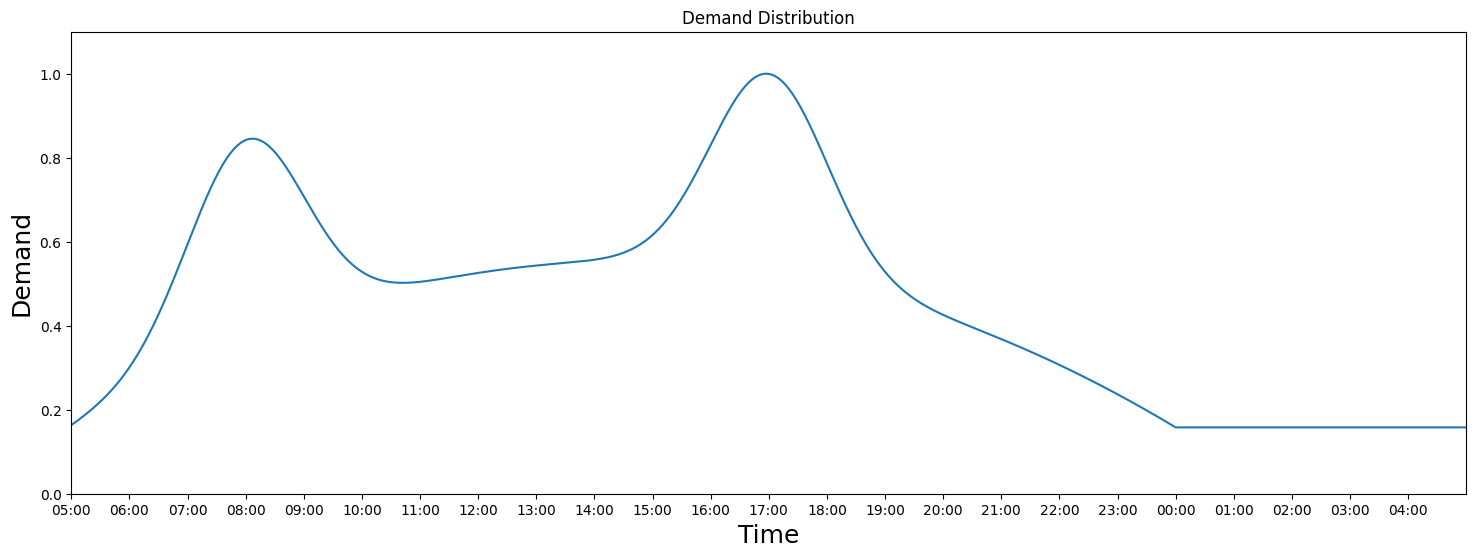

In [3]:
model.draw_prob_des()
plt.title('Demand Distribution')
plt.show()

Next we will collect the data from the simulation.

## Collecting Data

### Collecting Agent Data into a DataFrame
For Battery we assign letter ``B`` in front of the Agent ID, for Motorist the letter ``M``, and finally for Station the letter ``S`` 

In [7]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

Position       Charge Alive
Step AgentID                            
0    0           None  2120.027218  None
     1           None  1638.704295  None
     2           None  1828.085936  None
     3           None  1348.294830  None
     4           None   498.377272  None

In [6]:
agent_data.tail()

Position       Charge Alive
Step AgentID                            
0    0           None  2120.027218  None
     1           None  1638.704295  None
     2           None  1828.085936  None
     3           None  1348.294830  None
     4           None   498.377272  None

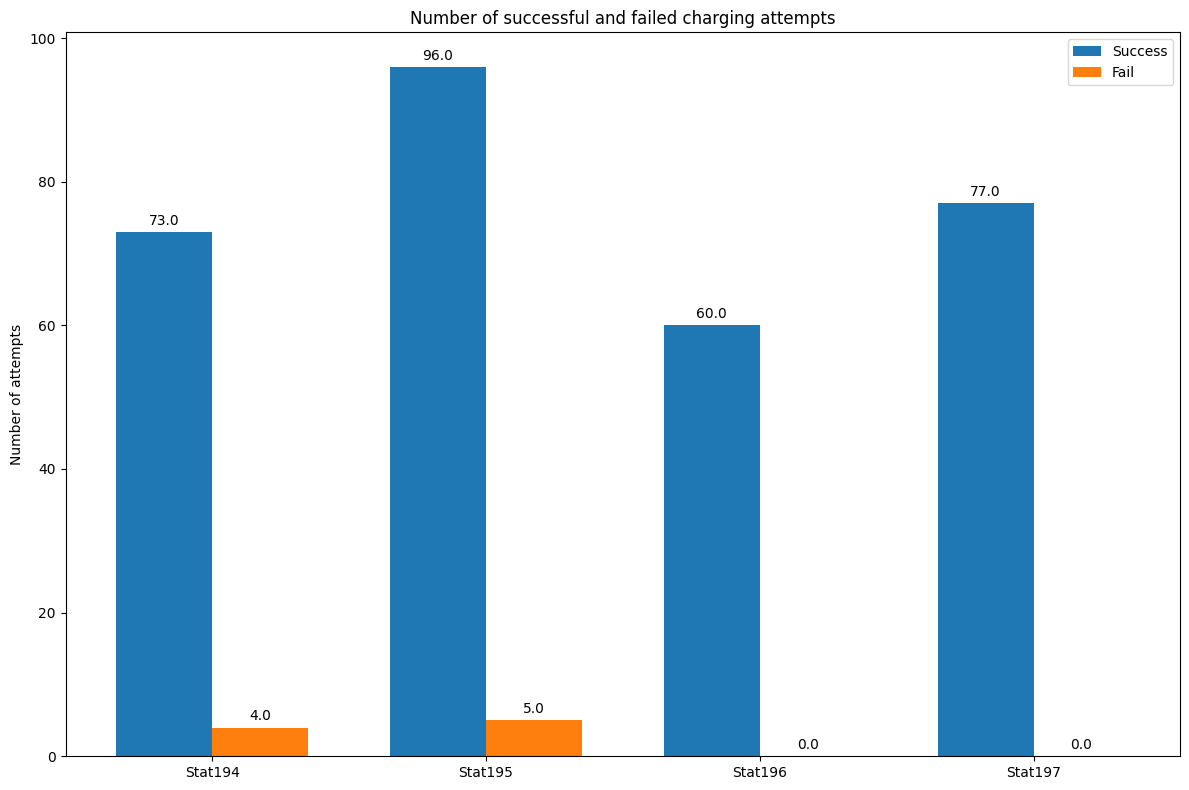

In [4]:
model.plot_reg()

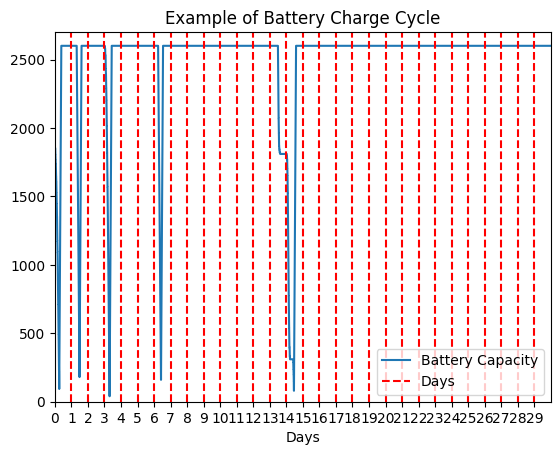

In [18]:
battery_id = 40
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()
plt.xlim(0,num_of_step)
plt.ylim(0,2700)
for i in range(1,days):
    plt.axvline(x = 1440*i, color = 'r', linestyle='--', label = 'axvline - full height')
plt.legend(['Battery Capacity','Days'])
locs, labels = plt.xticks()  # Get the current locations and labels.
plt.xticks(np.arange(0, days*1440, step=1440))  # Set label locations.
plt.xticks(np.arange(days)*1440, np.arange(0,days))  # Set text labels.
#plt.xticks([0, 1, 2], ['January', 'February', 'March'],
#       rotation=20)  # Set text labels and properties.
plt.xlabel('Days')
plt.title('Example of Battery Charge Cycle')
plt.show()

### Collecting Agent's Data

In [19]:
motorist_id = []
for mot in model.motorists:
    motorist_id.append(mot.unique_id)

#ID motor pertama dan terakhir
first_motor = min(motorist_id)
last_motor = max(motorist_id)

#Ambil data motor doang
motorist_data = agent_data.loc[(agent_data.index.get_level_values('AgentID')>=first_motor) & (agent_data.index.get_level_values('AgentID') <=last_motor)]


motorist_alive_position = motorist_data.loc[motorist_data['Alive'] == True]["Position"]

#print jumlah baris
print(len(motorist_alive_position.index))

223733


In [20]:
sample_257 = motorist_alive_position.loc[motorist_alive_position.index.get_level_values('AgentID') == 257].tolist()

### List all of the positions of the alive motorists

In [21]:
array_alive_positions = motorist_alive_position.tolist()
print(len(array_alive_positions))

223733


### Distribution of the Agent

Text(50.722222222222214, 0.5, 'y')

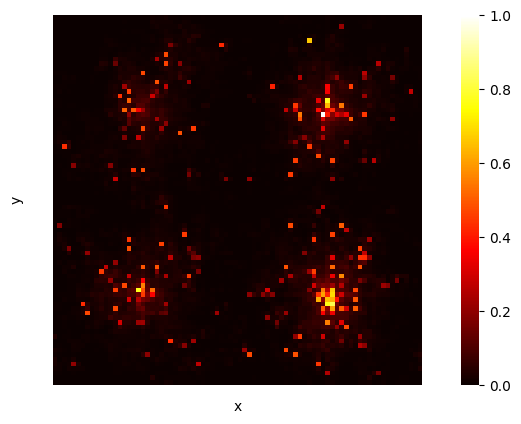

In [22]:
heatmap_data = np.zeros((model.grid.width, model.grid.height))
for coor in array_alive_positions:
    x,y = coor
    heatmap_data[x,y] +=1

most_frequent = np.amax(heatmap_data)
norm_heatmap_data = heatmap_data/most_frequent

ax = sns.heatmap(norm_heatmap_data, cmap = 'hot')
ax.invert_yaxis()
plt.axis('equal')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
plt.tick_params(left = False, bottom = False)
ax.set_xlabel('x')
ax.set_ylabel('y')